In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,top_k_accuracy_score,f1_score,r2_score,mean_absolute_error,mean_squared_error,classification_report

In [2]:
data=pd.read_csv("/content/drive/MyDrive/DataSets/Thyroid_Disease_Data.csv")

#Problem statement

> Here we have to do classification and regression

>Classification : To classify that the given patient cured or not

> Regression : To predict the chances of cure for a given patient

#Data
>Age: The age of the patient.

>Gender: The gender of the patient.

>Smoking: Whether the patient is a smoker.

>Hx Smoking: History of smoking .

>Hx Radiotherapy: History of radiotherapy.
(uses high doses of radiation to kill cancer cells)

>Thyroid Function: Results or status of thyroid function tests.

>Physical Examination: Results from a physical examination, likely related to thyroid examination.

>Adenopathy: Presence of swollen or abnormal lymph nodes.

>Pathology: Results of pathology tests, possibly related to thyroid tissue.(Pathology is the study of disease)

>Focality: Whether the disease or condition is localized (focal) or not.

>Risk: Risk assessment, possibly for disease progression or recurrence.

>T: Tumor , **T** describes the size and extent of the main tumor (primary tumor)..

>N: Node involvement , **N** indicates whether the cancer has spread to nearby lymph nodes.

>M: Metastasis status , **M** indicates whether the cancer has spread to other parts of the body (distant metastasis).

>Stage: Overall stage of the disease, based on TNM staging.

>Response: Patient's response to treatment.

#Target
>Recurred: Whether the disease has recurred.

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

Renaming, removing columns

In [5]:
data=data.rename(columns={"Hx Smoking":"Smoking_Hist","Hx Radiothreapy":"Radiothreapy_Hist","Thyroid Function":"Thyroid_Function","Physical Examination":"Physical_Examination","T":"Tumor","N":"Nodes","M":"Metastasis"})
cols=[i for i in data.columns]
cols

['Age',
 'Gender',
 'Smoking',
 'Smoking_Hist',
 'Radiothreapy_Hist',
 'Thyroid_Function',
 'Physical_Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'Tumor',
 'Nodes',
 'Metastasis',
 'Stage',
 'Response',
 'Recurred']

In [6]:
data["Recurred"] = data["Recurred"].replace({"No": 0, "Yes": 1})
y=data["Recurred"]
X=data.drop(columns=["Recurred"])
print(X.shape,y.shape)

(383, 16) (383,)


In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,shuffle=True,test_size=0.2)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [8]:
print(X_train.shape,X_test.shape,"\n")
print(y_train.shape,y_test.shape)
y_test.head()

(306, 55) (77, 55) 

(306,) (77,)


,Recurred
180,0
133,0
254,0
100,0
200,0


In [9]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
imp_features=rf_model.feature_importances_
features=pd.DataFrame({"features_names":X_train.columns,"importance":imp_features})
features=features.sort_values(by="importance",ascending=False)
threshold = 0.02
selected_features = features[features['importance'] > threshold]['features_names']# this syntax is select features from features where this condition is true only for features_names
selected_features=selected_features.to_list()#series to list

In [10]:
print(selected_features)

['Response_Structural Incomplete', 'Risk_Low', 'Response_Excellent', 'Nodes_N0', 'Adenopathy_No', 'Nodes_N1b', 'Response_Indeterminate', 'Age', 'Risk_Intermediate', 'Risk_High']


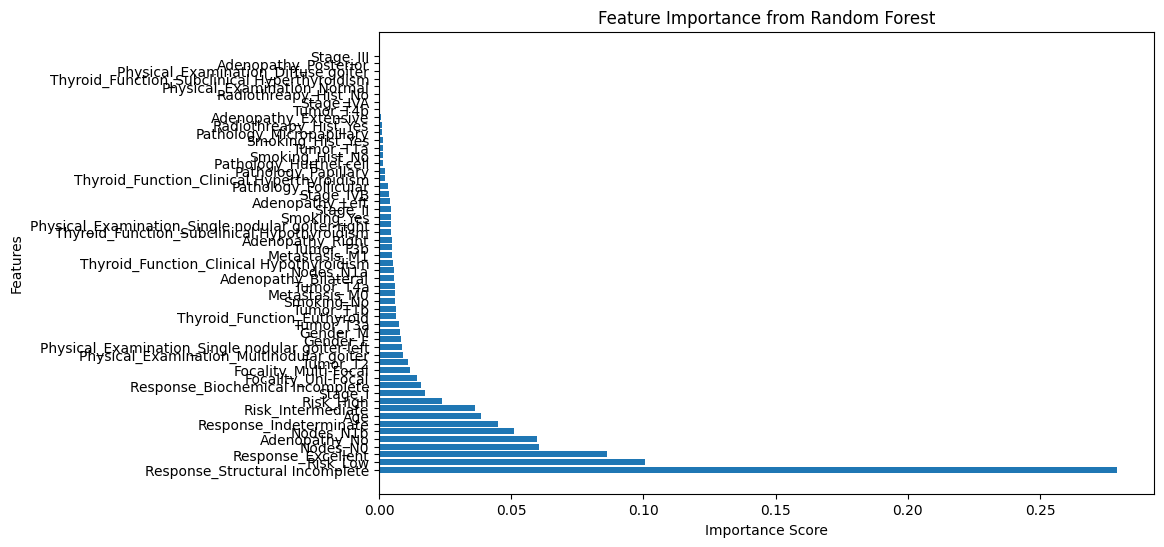

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features['features_names'], features['importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


In [12]:
final_X_train=X_train[selected_features]
final_X_test=X_test[selected_features]
print(final_X_train.shape,final_X_test.shape)
# print(final_X_train.head())

(306, 10) (77, 10)


In [13]:
final_X_train.head()

,Response_Structural Incomplete,Risk_Low,Response_Excellent,Nodes_N0,Adenopathy_No,Nodes_N1b,Response_Indeterminate,Age,Risk_Intermediate,Risk_High
63,False,True,False,True,True,False,True,54,False,False
289,False,False,True,False,False,True,False,27,True,False
303,True,False,False,True,True,False,False,73,True,False
60,False,True,True,True,True,False,False,24,False,False
134,False,True,True,True,True,False,False,51,False,False


In [14]:
def accuracy_xscore(test,pred):
    tac=top_k_accuracy_score(test,pred)
    print(f"top 2 accuracy_score:{tac}")
    f1=f1_score(test,pred)
    print(f"f1_score :{f1}")

# def pred_scorex(test,pred):
#     r2=r2_score(test,pred)
#     print("r2_score:",r2)
#     mae=mean_absolute_error(test,pred)
#     print("mean_absolute_error:",mae)
#     mse=mean_squared_error(test,pred)
#     rmse=np.sqrt(mse)
#     print("root mean_squared_error:",rmse)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(final_X_train,y_train,random_state=49,shuffle=True,test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(244, 10) (244,) (62, 10) (62,)


In [16]:
import pickle

In [17]:
SVC = SVC(

).fit(X_train, y_train)
pred=SVC.predict(X_test)
accuracy_score(y_test,pred)

0.6129032258064516

In [18]:
filenamey="LOR.95.sav"
pickle.dump(LOR,open(filenamey,"wb"))

NameError: name 'LOR' is not defined

In [ ]:
# with open("train_test_data.sav", "wb") as file:
#     pickle.dump({
#         'X_train': X_train,
#         'X_test': X_test,
#         'y_train': y_train,
#         'y_test': y_test
#     }, file)
# with open("train_test_data.sav", "rb") as file:
#     data = pickle.load(file)



In [ ]:
# rf_reg=RandomForestRegressor().fit(X_train,y_train)
# reg_pred=rf_reg.predict(X_test)

rf_class=RandomForestClassifier().fit(X_train,y_train)
class_pred=rf_class.predict(X_test)


In [ ]:
print(y_test.shape,X_test.shape)

In [ ]:
# print("Regression Results: ")
# pred_scorex(y_test,reg_pred)
print("Classification results: ")
accuracy_xscore(y_test,class_pred)
ac=accuracy_score(y_test,class_pred)
print(f"accuracy_score :{ac}\n")
print(classification_report(y_test,class_pred))

In [ ]:
# !pip install optuna

In [ ]:

# import optuna
# from sklearn.model_selection import cross_val_score#cv=k_folds
# def objective(trial):
#     params = {'n_estimators': trial.suggest_int('n_estimators', 100, 1000),#Here use your own params(useful),not entire param list
#               'max_depth': trial.suggest_int('max_depth', 10, 50)
#               }#'min_samples_split': trial.suggest_int('min_samples_split', 2, 32), 'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 32)

#     model = RandomForestClassifier(**params)
#     return -cross_val_score(model, X_train,y_train, n_jobs=-1, cv=15).mean()#here tweak the crosss validation cv=xyz,your wish

# study = optuna.create_study(study_name="hyper param selection .-.",direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
# study.optimize(objective, n_trials=15)#Here the tweak to chek more times to get more good results

# best_params = study.best_params
# best_score = study.best_value
# print(f"Best Hyperparameters: {best_params}")
# print(f"Best Accuracy: {-best_score:.3f}")

In [ ]:
# rf_reg = RandomForestRegressor(
#     n_estimators=567,
#     max_depth=43,
#     # min_samples_split=13
# ).fit(X_train, y_train)
# reg_pred=rf_reg.predict(X_test)

Knn = KNeighborsClassifier(
    n_neighbors=505, weights='distance'
).fit(X_train, y_train)
class_pred=rf_class.predict(X_test)

In [ ]:
# print("Regression Results: ")
# pred_scorex(y_test,reg_pred)
print("\n\nClassification results: ")
# accuracy_xscore(y_test,class_pred)
ac=accuracy_score(y_test,class_pred)
print(f"accuracy_score :{ac}\n")
# print(classification_report(y_test,class_pred))

In [ ]:

#load_model=pickle.load(open("RFR_max_dep_.93.sav","rb"))

In [ ]:
print(selected_features)

In [ ]:
final_X_train.head(1)

In [ ]:
input_data=(0,1,0,0,1,1,54,1,1,0,0)
input_data2=np.array(input_data)
input_data3=input_data2.reshape(1,-1)
# reg_prediction=rf_reg.predict(input_data3)
class_prediction=rf_class.predict(input_data3)
print(class_prediction)
if class_prediction[0]==0:
    print("It cant be cured")
else:print("it can be cured")
# print(f"the chances of curing it is : {reg_prediction}%")

In [ ]:
import pickle

In [ ]:
# filenamex="Thyrostream_reg.sav"
# pickle.dump(rf_reg,open(filenamex,"wb"))
# load_model=pickle.load(open("Thyrostream_reg.sav","rb"))

In [ ]:
filenamey="Thyrostream_clas.sav"
pickle.dump(rf_class,open(filenamey,"wb"))
load_model=pickle.load(open("Thyrostream_clas.sav","rb"))

In [ ]:
load_model=pickle.load(open("Thyrostream_clas.sav","rb"))